## Theory Questions (Q1 - Q8)

**Question 1:What is a random variable in probability theory?**

A random variable is a numerical quantity whose value depends on the outcome of a random phenomenon. Formally, it is a function that assigns a real number to each outcome in a probability space.

**Question 2:What are the types of random variables?**

Types: (a) Discrete random variables — take countable values (e.g., 0,1,2,...). (b) Continuous random variables — take values in an interval (uncountably infinite), described by probability density functions.

**Question 3:Explain the difference between discrete and continuous distributions.**

Discrete distributions assign probabilities to individual outcomes (e.g., Binomial, Poisson). Continuous distributions use densities and probabilities are areas under the density curve (e.g., Normal, Exponential). Discrete PMF sums to 1; continuous PDF integrates to 1.

**Question 4:What is a binomial distribution, and how is it used in probability?**

Binomial distribution models the number of successes in n independent Bernoulli trials with success probability p. P(X=k)=C(n,k)p^k(1-p)^{n-k}. Used for yes/no repeated experiments (e.g., defective items in a sample).

**Question 5:What is the standard normal distribution, and why is it important?**

The standard normal distribution is the Normal(0,1) (mean 0, sd 1). It's important because many statistics can be standardized to it (z-scores), and it serves as the reference for normal-theory inference (tables, z-tests).

**Question 6:What is the Central Limit Theorem (CLT), and why is it critical in statistics?**

Central Limit Theorem (CLT): For a large sample size n, the distribution of the sample mean (or sum) of i.i.d. random variables approaches a normal distribution with mean equal to the population mean and variance equal to population variance/n, regardless of the original distribution's shape. Critical because it justifies using normal-based inference (confidence intervals, hypothesis tests) even when the population is not normal.

**Question 7:What is the significance of confidence intervals in statistical analysis?**

Confidence intervals provide a range of plausible values for an unknown parameter (e.g., population mean). A 95% CI means that, over many repeated samples, 95% of such intervals will contain the true parameter. They convey uncertainty in point estimates.

**Question 8:What is the concept of expected value in a probability distribution?**

Expected value (mean) of a random variable is the long-run average value: for discrete X, E[X]=sum x * P(X=x); for continuous X, E[X]=∫ x f(x) dx. It measures the central tendency of the distribution.



Sample mean: 50.096660279111624
Sample std (ddof=1): 4.896079690898378


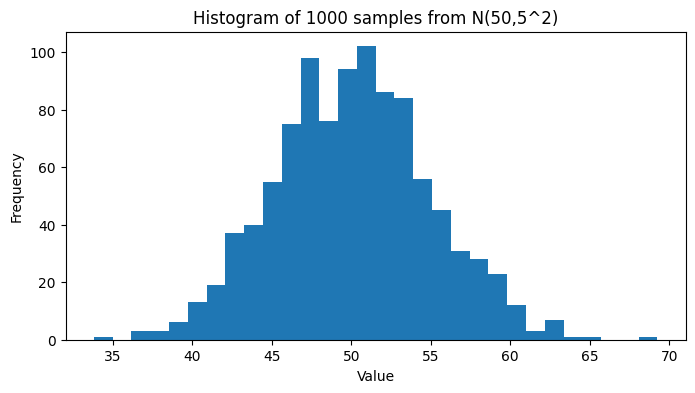

In [1]:
# Question 9
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
samples = np.random.normal(loc=50, scale=5, size=1000)
print("Sample mean:", samples.mean())
print("Sample std (ddof=1):", samples.std(ddof=1))

plt.figure(figsize=(8,4))
plt.hist(samples, bins=30)
plt.title("Histogram of 1000 samples from N(50,5^2)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


## Question 10 — CLT application and 95% CI for average daily sales

**Approach (using CLT):**
- The Central Limit Theorem tells us that the distribution of the sample mean is approximately normal when sample size is reasonably large (common rule: n ≥ 30). For smaller n, if the original data are not strongly non-normal, the t-distribution gives better coverage.
- We compute the sample mean \(\bar{x}\), sample standard deviation s, standard error \(SE = s/\sqrt{n}\), and then a 95% confidence interval:
  - If using t-distribution: \(\bar{x} \pm t_{0.975, n-1} \times SE\).
  - If using normal approx (z): \(\bar{x} \pm 1.96 \times SE\).


In [2]:
# Question 10 code: compute mean and 95% CI for daily_sales
import numpy as np, math
daily_sales = [220, 245, 210, 265, 230, 250, 260, 275, 240, 255, 235, 260, 245, 250, 225, 270, 265, 255, 250, 260]
n = len(daily_sales)
mean_sales = np.mean(daily_sales)
std_sales = np.std(daily_sales, ddof=1)
se = std_sales / math.sqrt(n)

try:
    from scipy import stats
    t_crit = stats.t.ppf(0.975, df=n-1)
    crit_name = f"t (df={n-1})"
except Exception:
    t_crit = 1.96
    crit_name = "z (normal approx)"

ci_lower = mean_sales - t_crit * se
ci_upper = mean_sales + t_crit * se

print("n =", n)
print("Sample mean =", mean_sales)
print("Sample sd (ddof=1) =", std_sales)
print("Standard error =", se)
print(f"Using critical value: {t_crit} ({crit_name})")
print(f"95% CI for mean: [{ci_lower:.3f}, {ci_upper:.3f}]")


n = 20
Sample mean = 248.25
Sample sd (ddof=1) = 17.26534405284638
Standard error = 3.860648295708623
Using critical value: 2.093024054408263 (t (df=19))
95% CI for mean: [240.170, 256.330]
